In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import pyproj
from skimage.morphology import octagon
import skimage.morphology as morph

In [2]:
#PATH
input_vari = 'out_raster/index/vari.tif'
input_gli = 'out_raster/index/gli.tif'
input_exg = 'out_raster/index/exg.tif'

In [3]:
#from rasterio import features
with rasterio.open(input_vari) as dvari:
    vari = dvari.read(1).astype(np.float32)
    meta_vari = dvari.meta
    nodata_vari = meta_vari['nodata']  # Extract the nodata value
    
#from rasterio import features
with rasterio.open(input_gli) as dgli:
    gli = dgli.read(1).astype(np.float32)
    meta_gli = dgli.meta
    nodata_gli = meta_gli['nodata']  # Extract the nodata value
    
#from rasterio import features
with rasterio.open(input_exg) as dexg:
    exg = dexg.read(1).astype(np.float32)
    meta_exg = dexg.meta
    nodata_exge = meta_exg['nodata']  # Extract the nodata value

In [4]:
footprint = octagon(5,5) # initialize to 5,5

In [5]:
#Apply Dilation to the raster based in a octagon algorithm
vari_dilated = morph.dilation(vari, footprint)
gli_dilated = morph.dilation(gli, footprint)
exg_dilated = morph.dilation(exg, footprint)

(array([3.60000000e+01, 3.20000000e+01, 6.60000000e+01, 1.36000000e+02,
        2.78000000e+02, 4.66000000e+02, 1.25500000e+03, 1.30510000e+04,
        2.78869000e+05, 4.19050100e+06, 1.35168088e+08, 1.03954230e+07,
        1.20390000e+07, 2.57039070e+07, 2.88241410e+07, 1.74630700e+07,
        5.82422300e+06, 1.51242600e+06, 4.85596000e+05, 1.46382000e+05,
        4.32370000e+04, 9.67700000e+03, 2.64300000e+03, 8.52000000e+02,
        5.60000000e+01]),
 array([-172.        , -155.3999939 , -138.80000305, -122.19999695,
        -105.59999847,  -89.        ,  -72.40000153,  -55.79999924,
         -39.20000076,  -22.60000038,   -6.        ,   10.60000038,
          27.20000076,   43.79999924,   60.40000153,   77.        ,
          93.59999847,  110.19999695,  126.80000305,  143.3999939 ,
         160.        ,  176.6000061 ,  193.19999695,  209.80000305,
         226.3999939 ,  243.        ]),
 <BarContainer object of 25 artists>)

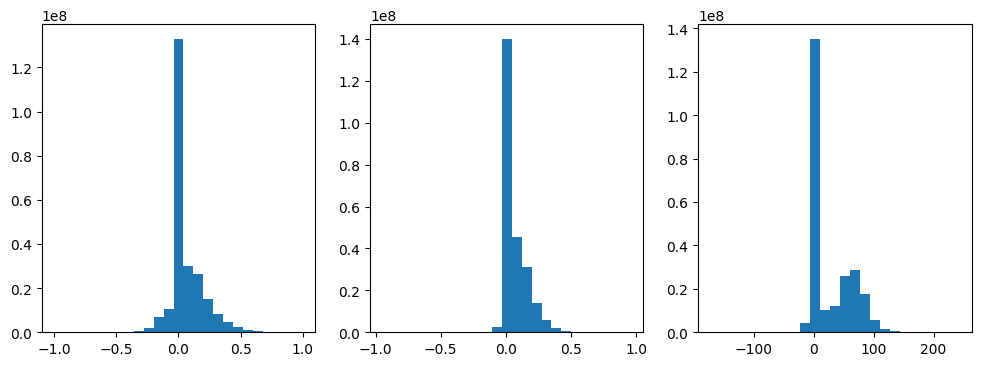

In [8]:
fig, (a1, a2, a3) = plt.subplots(1,3, figsize=(12,4))
a1.hist(vari.flatten(), bins=25)
a2.hist(gli.flatten(), bins=25)
a3.hist(exg.flatten(), bins=25)

(array([2.710000e+02, 2.255000e+03, 5.917200e+04, 4.295656e+06,
        3.518077e+06, 7.347310e+05, 1.688490e+05, 1.121420e+05,
        7.551600e+04, 6.889400e+04, 6.950900e+04, 6.174200e+04,
        7.153900e+04, 7.304600e+04, 9.705800e+04, 1.564080e+05,
        1.861390e+05, 2.260560e+05, 1.832920e+05, 1.116350e+05,
        5.381500e+04, 1.410200e+04, 4.534000e+03, 1.281000e+03,
        5.550000e+02]),
 array([-30.        , -20.60000038, -11.19999981,  -1.79999995,
          7.5999999 ,  17.        ,  26.39999962,  35.79999924,
         45.20000076,  54.59999847,  64.        ,  73.40000153,
         82.80000305,  92.19999695, 101.59999847, 111.        ,
        120.40000153, 129.80000305, 139.19999695, 148.6000061 ,
        158.        , 167.3999939 , 176.80000305, 186.19999695,
        195.6000061 , 205.        ]),
 <BarContainer object of 25 artists>)

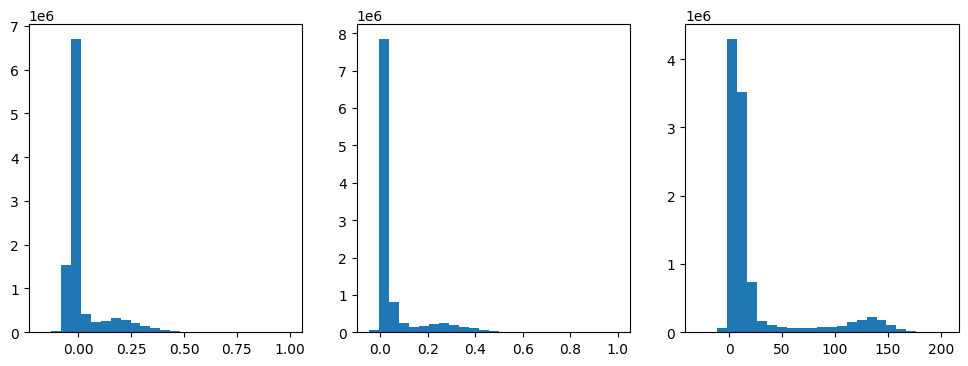

In [6]:
fig, (a1, a2, a3) = plt.subplots(1,3, figsize=(12,4))
a1.hist(vari_dilated.flatten(), bins=25)
a2.hist(gli_dilated.flatten(), bins=25)
a3.hist(exg_dilated.flatten(), bins=25)

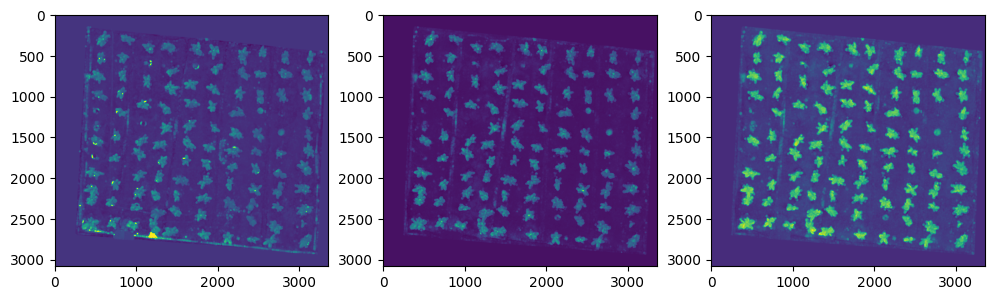

In [7]:
fig, (a1, a2, a3) = plt.subplots(1,3, figsize=(12,4))
a1.imshow(vari_dilated)
a2.imshow(gli_dilated)
a3.imshow(exg_dilated)

# Classify the nutrient Levels

In [9]:
from rasterio.transform import from_origin

In [11]:
#Intialize an empty arrays to store nutrient level classification
vari_classes = np.zeros(dvari.shape, dtype=np.float32)
gli_classes = np.zeros(dgli.shape, dtype=np.float32)
exg_classes = np.zeros(dexg.shape, dtype=np.float32)

In [12]:
print('VARI Min: ', np.min(vari_dilated), 'VARI Max', np.max(vari_dilated))
print('GLI Min: ', np.min(gli_dilated), 'GLI Max', np.max(gli_dilated))
print('EXG Min: ', np.min(exg_dilated), 'EXG Max', np.max(exg_dilated))

VARI Min:  -1.0 VARI Max 1.0
GLI Min:  -0.2631579 GLI Max 0.9622642
EXG Min:  -82.0 EXG Max 243.0


In [13]:
# VARI levels
no_vegetation_vari = (vari_dilated > -0.177) & (vari_dilated < 0.0)
nitrogen_low_vari = (vari_dilated > 0.09) & (vari_dilated <= 0.25)
nitrogen_med_vari = (vari_dilated > 0.25) & (vari_dilated <= 0.45)
nitrogen_high_vari = (vari_dilated > 0.45) & (vari_dilated <= 0.8)

In [14]:
# GLI levels
no_vegetation_gli = (gli_dilated > 0.001) & (gli_dilated < 0.09)
nitrogen_low_gli = (gli_dilated > 0.09) & (gli_dilated <= 0.25)
nitrogen_med_gli = (gli_dilated > 0.25) & (gli_dilated <= 0.45)
nitrogen_high_gli = (gli_dilated > 0.45) & (gli_dilated <= 0.8)

In [15]:
# EXG levels
no_vegetation_exg = (exg_dilated > 0) & (exg_dilated < 13)
nitrogen_low_exg = (exg_dilated > 70) & (exg_dilated <= 100)
nitrogen_med_exg = (exg_dilated > 100) & (exg_dilated <= 125)
nitrogen_high_exg = (exg_dilated > 125) & (exg_dilated <= 190)

# Assign the classified index to the empty array

In [16]:
vari_classes[no_vegetation_vari] = (10)
vari_classes[nitrogen_low_vari] = (20)
vari_classes[nitrogen_med_vari] = (30)
vari_classes[nitrogen_high_vari] = (40)

In [17]:
gli_classes[no_vegetation_gli] = (10)
gli_classes[nitrogen_low_gli] = (20)
gli_classes[nitrogen_med_gli] = (30)
gli_classes[nitrogen_high_gli] = (40)

In [18]:
exg_classes[no_vegetation_exg] = (10)
exg_classes[nitrogen_low_exg] = (20)
exg_classes[nitrogen_med_exg] = (30)
exg_classes[nitrogen_high_exg] = (40)

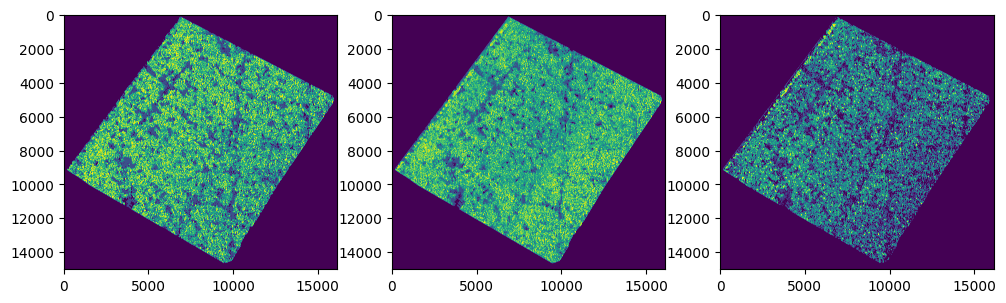

In [19]:
fig, (a1, a2, a3) = plt.subplots(1,3, figsize=(12,4))
a1.imshow(vari_classes)
a2.imshow(gli_classes)
a3.imshow(exg_classes)

# EXPORT CLASSIFIED INDEX

In [21]:
#VARI EXPORT
new_tiff_profile_vari = dvari.profile  # Copy the profile from the original dataset
new_tiff_profile_vari.update(
                        dtype=rasterio.float32,  # Update the data type to match the VARI data
                        count=1,  # Only one band for VARI
                        compress='lzw',  # You can choose a compression method if needed
                        tiled=False,
                        blockysize=1,
                        nodata=0.0
)
new_crs = pyproj.CRS.from_epsg(32651)
new_tiff_profile_vari.update(crs=new_crs)

#export data to file
with rasterio.open('out_raster/classified/vari_classes_hijo.tif', 'w', **new_tiff_profile_vari) as new_tiff:
                            new_tiff.write(vari_classes, 1)

In [23]:
#GLI EXPORT
new_tiff_profile_gli = dgli.profile  # Copy the profile from the original dataset
new_tiff_profile_gli.update(
                        dtype=rasterio.float32,  # Update the data type to match the VARI data
                        count=1,  # Only one band for VARI
                        compress='lzw',  # You can choose a compression method if needed
                        tiled=False,
                        blockysize=1,
                        nodata=0.0
)
new_crs = pyproj.CRS.from_epsg(32651)
new_tiff_profile_gli.update(crs=new_crs)

#export data to file
with rasterio.open('out_raster/classified/gli_classes_hijo.tif', 'w', **new_tiff_profile_gli) as new_tiff:
                            new_tiff.write(gli_classes, 1)

In [25]:
#EXG EXPORT
new_tiff_profile_exg = dexg.profile  # Copy the profile from the original dataset
new_tiff_profile_exg.update(
                        dtype=rasterio.float32,  # Update the data type to match the VARI data
                        count=1,  # Only one band for VARI
                        compress='lzw',  # You can choose a compression method if needed
                        tiled=False,
                        blockysize=1,
                        nodata=0.0
)
new_crs = pyproj.CRS.from_epsg(32651)
new_tiff_profile_exg.update(crs=new_crs)

#export data to file
with rasterio.open('out_raster/classified/exg_classes_hijo.tif', 'w', **new_tiff_profile_exg) as new_tiff:
                            new_tiff.write(exg_classes, 1)

# Export dilation

In [9]:
#VARI EXPORT
new_tiff_profile_vari = dvari.profile  # Copy the profile from the original dataset
new_tiff_profile_vari.update(
                        dtype=rasterio.float32,  # Update the data type to match the VARI data
                        count=1,  # Only one band for VARI
                        compress='lzw',  # You can choose a compression method if needed
                        tiled=False,
                        blockysize=1,
                        nodata=0.0
)
new_crs = pyproj.CRS.from_epsg(32651)
new_tiff_profile_vari.update(crs=new_crs)

#export data to file
with rasterio.open('out_raster/dilation/vari_dilate.tif', 'w', **new_tiff_profile_vari) as new_tiff:
                            new_tiff.write(vari_dilated, 1)

In [11]:
#GLI EXPORT
new_tiff_profile_gli = dgli.profile  # Copy the profile from the original dataset
new_tiff_profile_gli.update(
                        dtype=rasterio.float32,  # Update the data type to match the VARI data
                        count=1,  # Only one band for VARI
                        compress='lzw',  # You can choose a compression method if needed
                        tiled=False,
                        blockysize=1,
                        nodata=0.0
)
new_crs = pyproj.CRS.from_epsg(32651)
new_tiff_profile_gli.update(crs=new_crs)

#export data to file
with rasterio.open('out_raster/dilation/gli_dilate.tif', 'w', **new_tiff_profile_gli) as new_tiff:
                            new_tiff.write(gli_dilated, 1)

In [13]:
#EXG EXPORT
new_tiff_profile_exg = dexg.profile  # Copy the profile from the original dataset
new_tiff_profile_exg.update(
                        dtype=rasterio.float32,  # Update the data type to match the VARI data
                        count=1,  # Only one band for VARI
                        compress='lzw',  # You can choose a compression method if needed
                        tiled=False,
                        blockysize=1,
                        nodata=0.0
)
new_crs = pyproj.CRS.from_epsg(32651)
new_tiff_profile_exg.update(crs=new_crs)

#export data to file
with rasterio.open('out_raster/dilation/exg_classes_hijo.tif', 'w', **new_tiff_profile_exg) as new_tiff:
                            new_tiff.write(exg_dilated, 1)